In [1]:
import pandas as pd

data = pd.read_csv("./step_delay_mapping.csv")

model_exec_times = pd.read_parquet("../edgedroid/data/resources/model_exec_times.parquet")
neuro = model_exec_times.groupby(["run_id", "neuroticism"], observed=True).count().reset_index().drop(columns=["ttf", "exec_time"]).set_index("run_id")

data = data.join(other=neuro, on="participant", how="left")
data

,participant,abs_seq,start,end,duration,delay,block,block_seq,exec_time,neuroticism
0,134146,0,2019-11-15 19:19:22.728000+00:00,2019-11-15 19:19:27.019000+00:00,0 days 00:00:04.291000,0 days 00:00:00,0,0,0 days 00:00:03.029000,0.375
1,134146,1,2019-11-15 19:19:27.019000+00:00,2019-11-15 19:19:32.013000+00:00,0 days 00:00:04.994000,0 days 00:00:00,1,0,0 days 00:00:04.004000,0.375
2,134146,2,2019-11-15 19:19:32.013000+00:00,2019-11-15 19:19:35.520000+00:00,0 days 00:00:03.507000,0 days 00:00:00,1,1,0 days 00:00:02.625000,0.375
3,134146,3,2019-11-15 19:19:35.520000+00:00,2019-11-15 19:19:41.515000+00:00,0 days 00:00:05.995000,0 days 00:00:00,1,2,0 days 00:00:04.680000,0.375
4,134146,4,2019-11-15 19:19:41.515000+00:00,2019-11-15 19:19:47.301000+00:00,0 days 00:00:05.786000,0 days 00:00:00,1,3,0 days 00:00:05.197000,0.375
...,...,...,...,...,...,...,...,...,...,...
6755,137353,164,2019-11-26 18:59:22.272000+00:00,2019-11-26 18:59:29.299000+00:00,0 days 00:00:07.027000,0 days 00:00:00,21,7,0 days 00:00:06.358000,0.625
6756,137353,165,2019-11-26 18:59:29.299000+00:00,2019-11-26 18:59:34.517000+00:00,0 days 00:00:05.218000,0 days 00:00:00,21,8,0 days 00:00:03.840000,0.625
6757,137353,166,2019-11-26 18:59:34.517000+00:00,2019-11-26 18:59:38.547000+00:00,0 days 00:00:04.030000,0 days 00:00:00,21,9,0 days 00:00:02.932000,0.625
6758,137353,167,2019-11-26 18:59:38.547000+00:00,2019-11-26 18:59:41.454000+00:00,0 days 00:00:02.907000,0 days 00:00:00,21,10,0 days 00:00:01.874000,0.625


In [2]:
data = data.drop(columns=["start", "end", "duration"], errors="ignore")
data["participant"] = data["participant"].astype("category")
data["delay"] = pd.to_timedelta(data["delay"]).dt.total_seconds()
data["exec_time"] = pd.to_timedelta(data["exec_time"]).dt.total_seconds()
data

,participant,abs_seq,delay,block,block_seq,exec_time,neuroticism
0,134146,0,0.0,0,0,3.029,0.375
1,134146,1,0.0,1,0,4.004,0.375
2,134146,2,0.0,1,1,2.625,0.375
3,134146,3,0.0,1,2,4.680,0.375
4,134146,4,0.0,1,3,5.197,0.375
...,...,...,...,...,...,...,...
6755,137353,164,0.0,21,7,6.358,0.625
6756,137353,165,0.0,21,8,3.840,0.625
6757,137353,166,0.0,21,9,2.932,0.625
6758,137353,167,0.0,21,10,1.874,0.625


In [3]:
import numpy as np

def _block_seq(df: pd.DataFrame) -> pd.DataFrame:
    df["block_seq"] = np.arange(len(df.index))
    return df

def _shift(df: pd.DataFrame) -> pd.DataFrame:
    df[["delay", "block", "block_seq"]] = df[["delay", "block", "block_seq"]].shift().fillna(0)
    df  = df.groupby("block", as_index=False).apply(_block_seq)
    return df.droplevel(0)

shifted_data = data.groupby("participant", as_index=False).apply(_shift).droplevel(0)
shifted_data = shifted_data.rename(columns={"delay": "prev_delay", "block": "prev_block", "block_seq": "prev_block_seq"})
shifted_data

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_60058/3858455664.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shifted_data = data.groupby("participant", as_index=False).apply(_shift).droplevel(0)


,participant,abs_seq,prev_delay,prev_block,prev_block_seq,exec_time,neuroticism
0,134146,0,0.0,0.0,0,3.029,0.375
1,134146,1,0.0,0.0,1,4.004,0.375
2,134146,2,0.0,1.0,0,2.625,0.375
3,134146,3,0.0,1.0,1,4.680,0.375
4,134146,4,0.0,1.0,2,5.197,0.375
...,...,...,...,...,...,...,...
6755,137353,164,0.0,21.0,6,6.358,0.625
6756,137353,165,0.0,21.0,7,3.840,0.625
6757,137353,166,0.0,21.0,8,2.932,0.625
6758,137353,167,0.0,21.0,9,1.874,0.625


In [4]:
shifted_data["prev_ttf"] = 1.5 * shifted_data["prev_delay"]
shifted_data

,participant,abs_seq,prev_delay,prev_block,prev_block_seq,exec_time,neuroticism,prev_ttf
0,134146,0,0.0,0.0,0,3.029,0.375,0.0
1,134146,1,0.0,0.0,1,4.004,0.375,0.0
2,134146,2,0.0,1.0,0,2.625,0.375,0.0
3,134146,3,0.0,1.0,1,4.680,0.375,0.0
4,134146,4,0.0,1.0,2,5.197,0.375,0.0
...,...,...,...,...,...,...,...,...
6755,137353,164,0.0,21.0,6,6.358,0.625,0.0
6756,137353,165,0.0,21.0,7,3.840,0.625,0.0
6757,137353,166,0.0,21.0,8,2.932,0.625,0.0
6758,137353,167,0.0,21.0,9,1.874,0.625,0.0


In [5]:
shifted_data["prev_duration"] = pd.cut(shifted_data["prev_block_seq"] + 1, bins=[-np.inf, 5, 9, np.inf], right=False)
shifted_data["neuro"] = pd.cut(shifted_data["neuroticism"], bins=[-np.inf, .5, np.inf], right=False)
shifted_data

,participant,abs_seq,prev_delay,prev_block,prev_block_seq,exec_time,neuroticism,prev_ttf,prev_duration,neuro
0,134146,0,0.0,0.0,0,3.029,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
1,134146,1,0.0,0.0,1,4.004,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
2,134146,2,0.0,1.0,0,2.625,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
3,134146,3,0.0,1.0,1,4.680,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
4,134146,4,0.0,1.0,2,5.197,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
...,...,...,...,...,...,...,...,...,...,...
6755,137353,164,0.0,21.0,6,6.358,0.625,0.0,"[5.0, 9.0)","[0.5, inf)"
6756,137353,165,0.0,21.0,7,3.840,0.625,0.0,"[5.0, 9.0)","[0.5, inf)"
6757,137353,166,0.0,21.0,8,2.932,0.625,0.0,"[9.0, inf)","[0.5, inf)"
6758,137353,167,0.0,21.0,9,1.874,0.625,0.0,"[9.0, inf)","[0.5, inf)"


In [6]:
output = shifted_data[["participant", "prev_ttf", "exec_time", "prev_duration", "neuro", "neuroticism"]].copy()
output[["prev_duration", "neuro"]] = output[["prev_duration", "neuro"]].astype(pd.IntervalDtype())
output.to_parquet("../edgedroid/data/resources/curve_fitting_data.parquet")

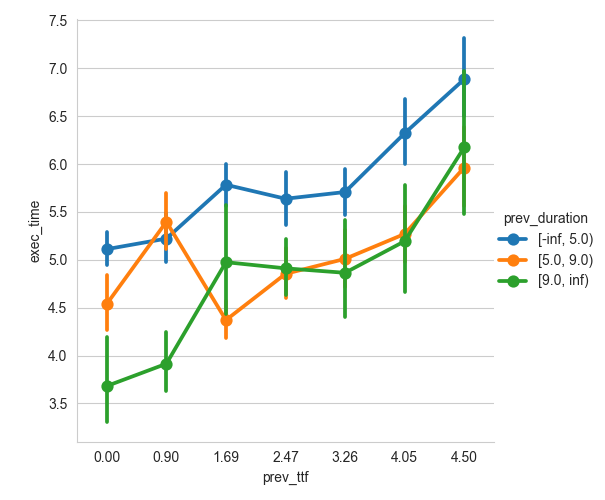

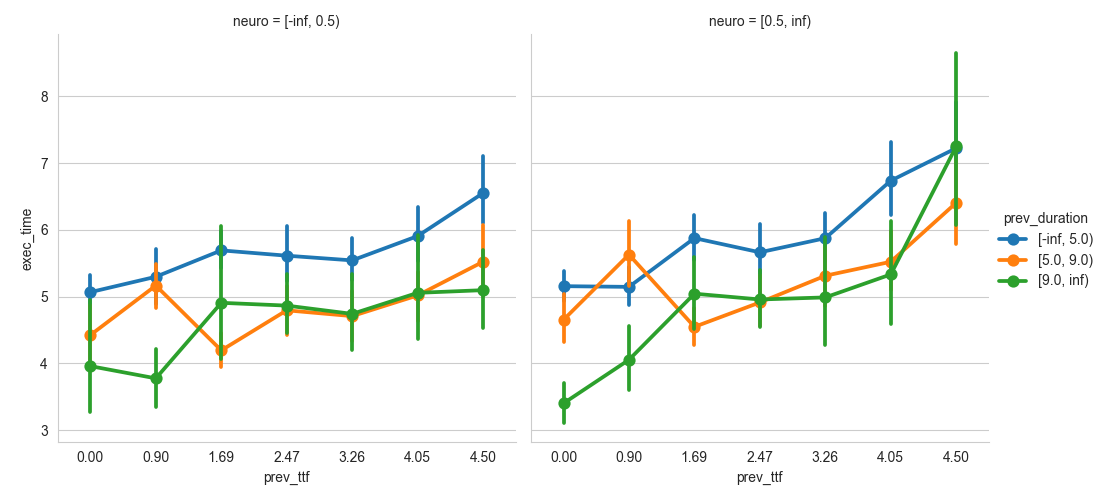

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_60058/2884546993.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_per_duration = shifted_data.groupby(["prev_duration", "prev_ttf", "neuro"])["exec_time"].mean()


prev_duration  prev_ttf  neuro      
[-inf, 5.0)    0.0000    [-inf, 0.5)    5.066825
                         [0.5, inf)     5.156307
               0.9000    [-inf, 0.5)    5.297122
                         [0.5, inf)     5.145720
               1.6875    [-inf, 0.5)    5.692146
                         [0.5, inf)     5.875746
               2.4750    [-inf, 0.5)    5.612782
                         [0.5, inf)     5.663143
               3.2625    [-inf, 0.5)    5.542251
                         [0.5, inf)     5.874777
               4.0500    [-inf, 0.5)    5.906436
                         [0.5, inf)     6.735388
               4.5000    [-inf, 0.5)    6.550135
                         [0.5, inf)     7.223127
[5.0, 9.0)     0.0000    [-inf, 0.5)    4.424234
                         [0.5, inf)     4.652918
               0.9000    [-inf, 0.5)    5.165369
                         [0.5, inf)     5.629194
               1.6875    [-inf, 0.5)    4.194756
                         [0.5, i

In [7]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np

ttfs = np.sort(shifted_data["prev_ttf"].unique())

fg = sns.catplot(data=shifted_data, x="prev_ttf", y="exec_time", hue="prev_duration", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

fg = sns.catplot(data=shifted_data, x="prev_ttf", y="exec_time", hue="prev_duration", col="neuro", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

means_per_duration = shifted_data.groupby(["prev_duration", "prev_ttf", "neuro"])["exec_time"].mean()
means_per_duration

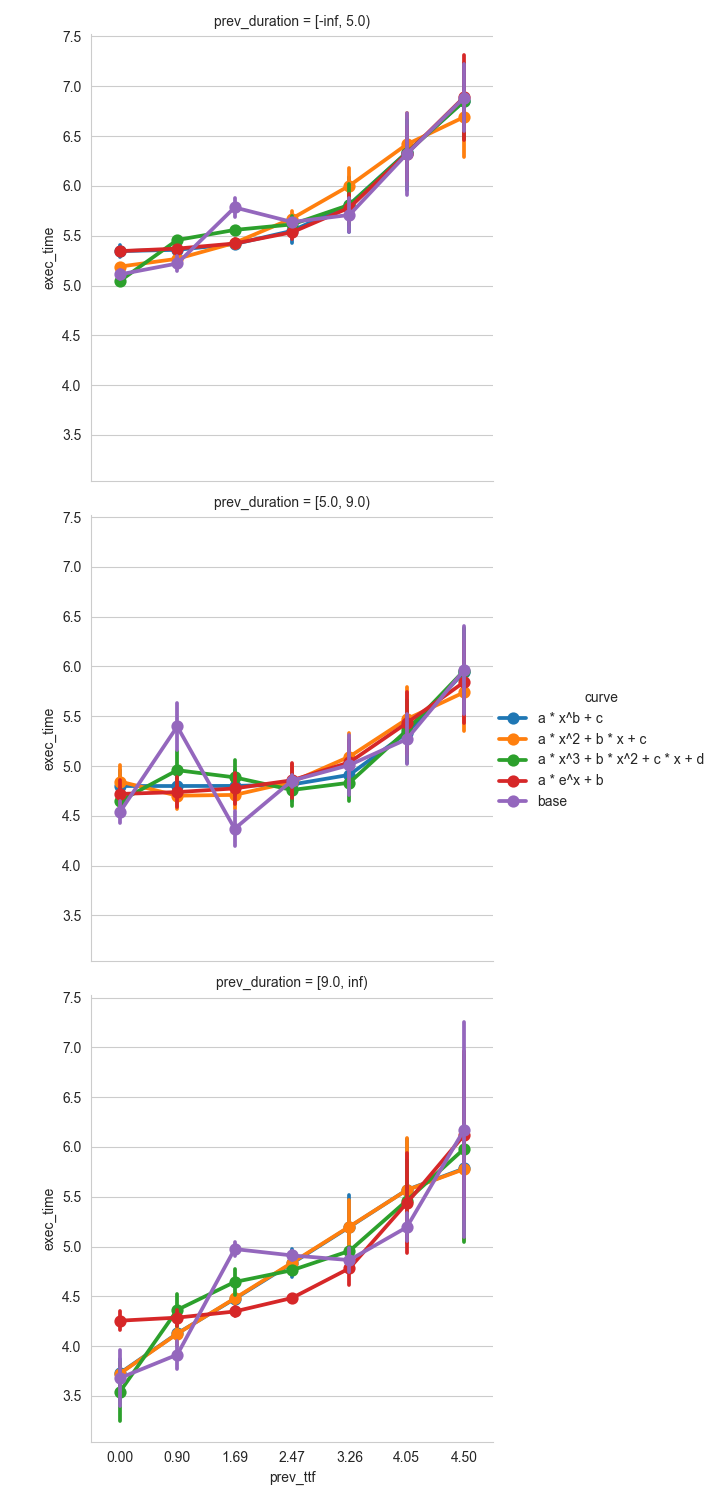

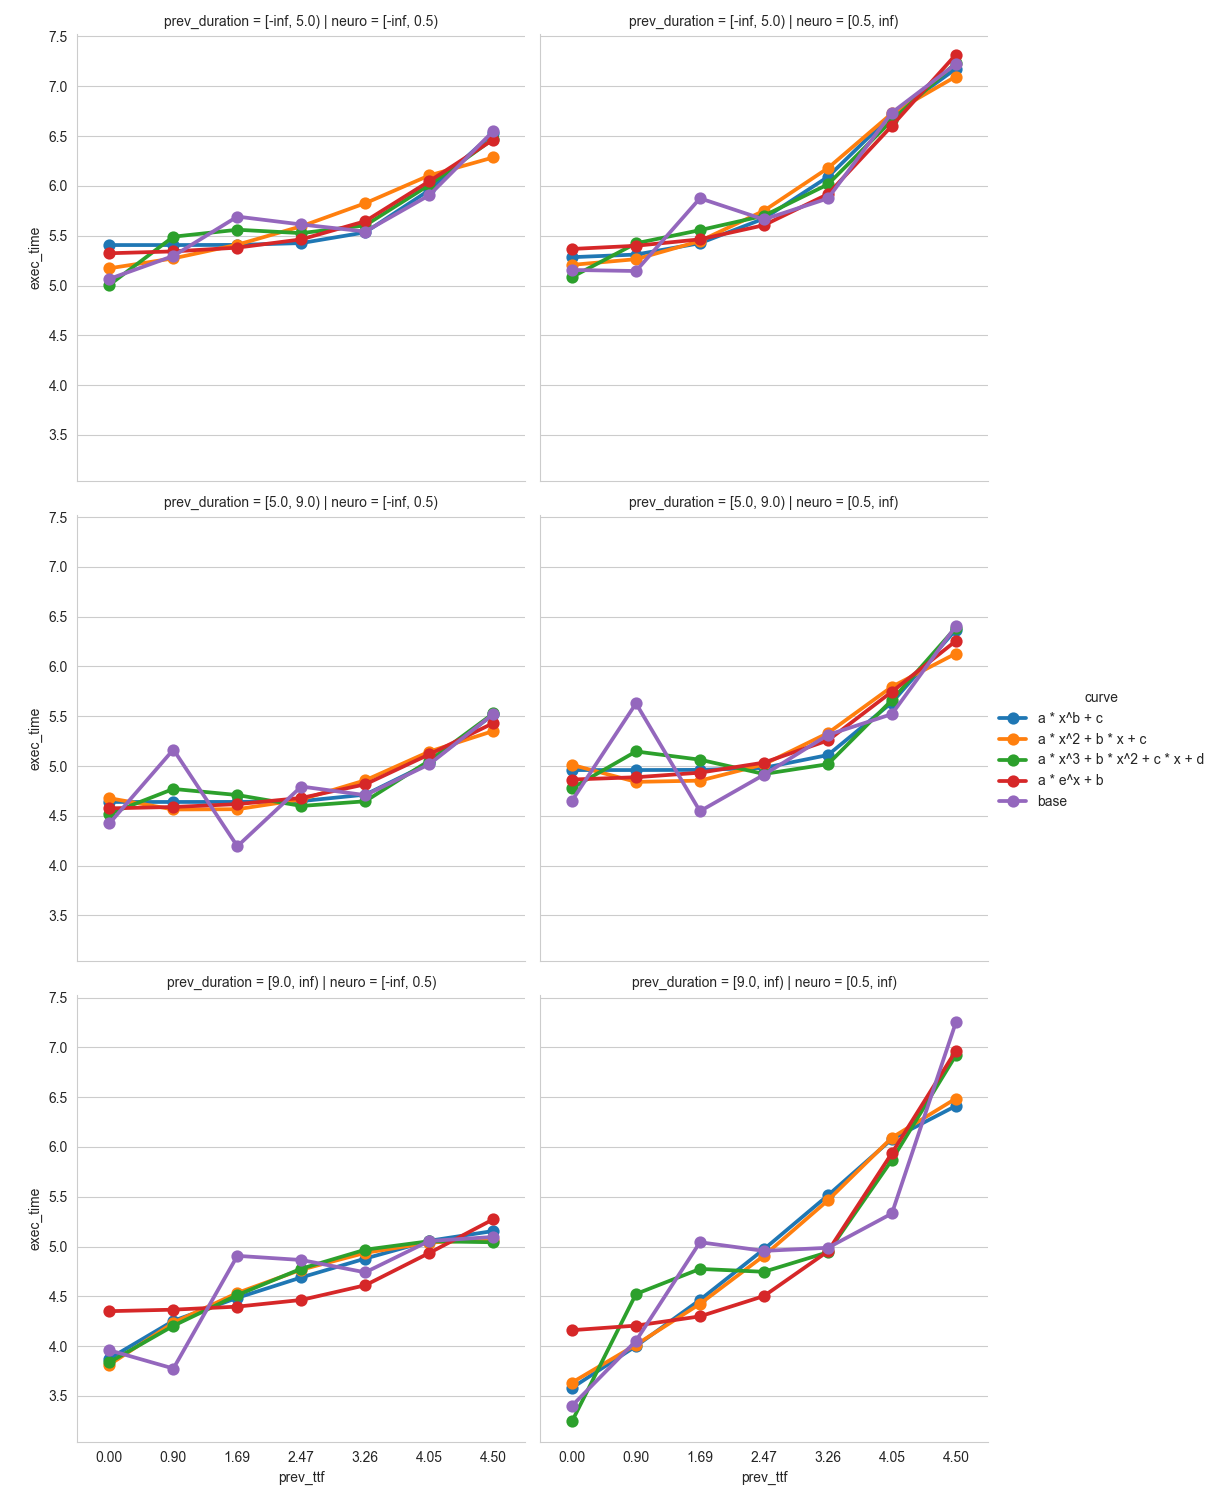

In [8]:
from scipy.optimize import curve_fit
from collections import deque
from abc import ABC, abstractmethod
import numpy.typing as npt


class CurveFit(ABC):
    @abstractmethod
    def __str__(self) -> str:
        pass
    
    @classmethod
    @abstractmethod
    def func(cls, x, *args, **kwargs) -> npt.ArrayLike:
        pass
    
    def __init__(self, x: npt.ArrayLike, y: npt.ArrayLike):
        self._opt, *_ = curve_fit(self.func, x, y)
    
    def y(self, x: npt.ArrayLike) -> npt.ArrayLike:
        return self.func(x, *self._opt)
    

class PowerFit(CurveFit):
    def __str__(self) -> str:
        return "a * x^b + c"

    @classmethod
    def func(cls, x, a, b, c) -> npt.ArrayLike:
        return a * np.power(x, b) + c

class SquareFit(CurveFit):
    def __str__(self) -> str:
        return "a * x^2 + b * x + c"
    
    @classmethod
    def func(cls, x, a, b, c) -> npt.ArrayLike:
        return a * np.square(x) + b * x + c
    
class CubeFit(CurveFit):
    def __str__(self) -> str:
        return "a * x^3 + b * x^2 + c * x + d"
    
    @classmethod
    def func(cls, x, a, b, c, d) -> npt.ArrayLike:
        return a * np.power(x, 3) + b * np.square(x) + c * x + d
    
class ExponentialFit(CurveFit):
    def __str__(self) -> str:
        return "a * e^x + b"
    
    @classmethod
    def func(cls, x, a, b) -> npt.ArrayLike:
        return a * np.exp(x) + b

rows = deque()
for (duration, neuro), data in means_per_duration.reset_index().groupby(["prev_duration", "neuro"], observed=True):
    for curve in (PowerFit, SquareFit, CubeFit, ExponentialFit):
        fitted_curve = curve(x=data["prev_ttf"], y=data["exec_time"])
        
        for ttf in data["prev_ttf"]:
            fitted_exec_time = fitted_curve.y(ttf)
            rows.append({
                "prev_duration": duration,
                "neuro": neuro, 
                "prev_ttf": ttf, 
                "exec_time": fitted_exec_time, 
                "curve": str(fitted_curve)
            })

fitted_means = pd.DataFrame(rows)
comp_means = fitted_means.copy()
base_means = means_per_duration.reset_index().copy()
base_means["curve"] = "base"
# comp_means["duration"] = comp_means["duration"].apply(lambda s: f"{s} fitted")
comp_means = pd.concat((comp_means,  base_means), axis=0)

ttfs = np.sort(shifted_data["prev_ttf"].unique())

fg = sns.catplot(data=comp_means, x="prev_ttf", y="exec_time", hue="curve", kind="point", row="prev_duration")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

fg = sns.catplot(data=comp_means, x="prev_ttf", y="exec_time", hue="curve", col="neuro", row="prev_duration", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

